In [2]:
import matplotlib.pyplot as plt
import numpy as np
import covasim as cv
import sys
sys.path.append('models/')
from useful_functions import  dissemblance_1, dissemblance_2, dissemblance_3, dissemblance_4, diff_between_2_arrays, diff_between_2_arrays_2


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


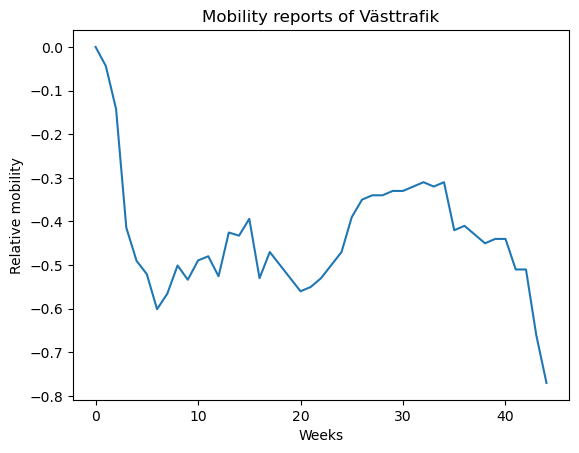

In [3]:
# from notebook 00
mobility='''0
-0,0436877025562212
-0,142183890633573
-0,414264196497882
-0,490226517606742
-0,520691444229291
-0,601104998394856
-0,565468289968282
-0,500887028474234
-0,533539503417897
-0,489363271950639
-0,479732407975015
-0,525650201055078
-0,4254
-0,4325
-0,394
-0,53
-0,47
-0,5
-0,53
-0,56
-0,55
-0,53
-0,5
-0,47
-0,39
-0,35
-0,34
-0,34
-0,33
-0,33
-0,32
-0,31
-0,32
-0,31
-0,42
-0,41
-0,43
-0,45
-0,44
-0,44
-0,51
-0,51
-0,66
-0,77
'''.replace(',','.').split('\n')


floatmobility = [float(i) for i in mobility if i != '']

plt.plot(floatmobility)
plt.title('Mobility reports of Västtrafik')
plt.ylabel('Relative mobility')
plt.xlabel('Weeks')
plt.show()

In [ ]:
# From notebook 00

if True:    
    all_simuls=[]
    for i in range(14): 
        coefs = [ 1 for _ in range(14)]
        coefs[i]=2
        params_custom = dict(
        pop_size=50000,
        start_day='2020-03-01',
        end_day='2021-03-01',
        pop_type='hybrid',
        beta=0.015,
        location='Sweden',
        pop_infected=10,
        dur={
            'exp2inf': {'dist':'lognormal_int', 'par1':4.5*coefs[0], 'par2':1.5}, # par 1 = mean of the log normal distrib, par 2 = std of the log normal distrib. par1 represents the expected value of the number of days between exposure and infection
            'inf2sym': {'dist':'lognormal_int', 'par1':1.1*coefs[1], 'par2':0.9},
            'sym2sev': {'dist':'lognormal_int', 'par1':6.6*coefs[2], 'par2':4.9},
            'sev2crit': {'dist':'lognormal_int', 'par1':1.5*coefs[3], 'par2':2.0},
            'asym2rec': {'dist':'lognormal_int', 'par1':8.0*coefs[4], 'par2':2.0},
            'mild2rec': {'dist':'lognormal_int', 'par1':8.0*coefs[5], 'par2':2.0},
            'sev2rec': {'dist':'lognormal_int', 'par1':18.1*coefs[6], 'par2':6.3},
            'crit2rec': {'dist':'lognormal_int', 'par1':18.1*coefs[7], 'par2':6.3},
            'crit2die': {'dist':'lognormal_int', 'par1':10.7*coefs[8], 'par2':4.8},
        }, 
        rel_symp_prob= 1.0*coefs[9],
        rel_severe_prob=1.0*coefs[10],
        rel_crit_prob=1.0*coefs[11],
        rel_death_prob=1.0*coefs[12]
        )
        
        # Define mobility coefficients and interventions
        all_days = cv.date_range(params_custom['start_day'], params_custom['end_day'])
        coef_mobility_custom = [1 for _ in range(len(all_days))]
        interventions_custom = cv.change_beta(days=all_days, changes=coef_mobility_custom, do_plot=False)

        # Create and run the simulation
        mysimul = cv.Sim(params_custom, interventions=interventions_custom)
        mysimul.run()
        all_simuls.append(np.array(mysimul.results['n_severe']))
        # Plot results
        plt.plot(mysimul.results['n_severe'])
        plt.xlabel('Day')
        plt.ylabel('Number of severe cases')
        plt.title('Number of severe cases over time with '+ str(i)+' -th parameter changed')
        plt.show()





fig, ax = plt.subplots(2, 2, figsize=(10, 8))

diff_max=0
imax=0
jmax=0
kmax=0
lmax=0

for i in range( 14):
    # print(i)
    for j in range(i+1, 14): 
        for k in range(j+1, 14): 
            for l in range(k+1, 14): 
                diff=dissemblance_1(all_simuls[i], all_simuls[j], all_simuls[k], all_simuls[l])
                if diff>diff_max: 
                    diff_max=diff
                    # print(i, j, k, l, diff_max)
                    imax=i
                    jmax=j
                    kmax=k
                    lmax=l
print('For dissemblance 1, the 4 most different pandemics are  '+str(imax)+', '+str(jmax)+', '+str(kmax)+', '+str(lmax)+' with a dissemblance of '+str(diff_max))


row=0
col=0

ax[row][col].plot(all_simuls[imax], label=str(imax))
ax[row][col].plot(all_simuls[jmax], label=str(jmax))
ax[row][col].plot(all_simuls[kmax], label=str(kmax))
ax[row][col].plot(all_simuls[lmax], label=str(lmax))

ax[row][col].legend()
ax[row][col].set_xlabel('Day')
ax[row][col].set_ylabel('Number of severe cases')
ax[row][col].set_title(r'4 most diverse simulations for $ \mathcal{L}_1$', fontsize=10)
ax[row][col].legend()
# ax[0][0].show()

diff_max=0
imax=0
jmax=0
kmax=0
lmax=0

for i in range( 14):
    # print(i)
    for j in range(i+1, 14): 
        for k in range(j+1, 14): 
            for l in range(k+1, 14): 
                diff=dissemblance_2(all_simuls[i], all_simuls[j], all_simuls[k], all_simuls[l])
                if diff>diff_max: 
                    diff_max=diff
                    # print(i, j, k, l, diff_max)
                    imax=i
                    jmax=j
                    kmax=k
                    lmax=l

print('For dissemblance 2, the 4 most different pandemics are  '+str(imax)+', '+str(jmax)+', '+str(kmax)+', '+str(lmax)+' with a dissemblance of '+str(diff_max))

row = 0 
col = 1

ax[row][col].plot(all_simuls[imax], label=str(imax))
ax[row][col].plot(all_simuls[jmax], label=str(jmax))
ax[row][col].plot(all_simuls[kmax], label=str(kmax))
ax[row][col].plot(all_simuls[lmax], label=str(lmax))

ax[row][col].legend()
ax[row][col].set_xlabel('Day')
ax[row][col].set_ylabel('Number of severe cases')
ax[row][col].set_title(r'4 most diverse simulations for $ \mathcal{L}_2 $', fontsize=10)
ax[row][col].legend()


diff_max=0
imax=0
jmax=0
kmax=0
lmax=0

for i in range( 14):
    # print(i)
    for j in range(i+1, 14): 
        for k in range(j+1, 14): 
            for l in range(k+1, 14): 
                diff=dissemblance_3(all_simuls[i], all_simuls[j], all_simuls[k], all_simuls[l])
                if diff>diff_max: 
                    diff_max=diff
                    # print(i, j, k, l, diff_max)
                    imax=i
                    jmax=j
                    kmax=k
                    lmax=l

print('For dissemblance 3, the 4 most different pandemics are  '+str(imax)+', '+str(jmax)+', '+str(kmax)+', '+str(lmax)+' with a dissemblance of '+str(diff_max))


row = 1
col = 0

ax[row][col].plot(all_simuls[imax], label=str(imax))
ax[row][col].plot(all_simuls[jmax], label=str(jmax))
ax[row][col].plot(all_simuls[kmax], label=str(kmax))
ax[row][col].plot(all_simuls[lmax], label=str(lmax))

ax[row][col].legend()
ax[row][col].set_xlabel('Day')
ax[row][col].set_ylabel('Number of severe cases')
ax[row][col].set_title(r'4 most diverse simulations for $ \mathcal{L}_3 $', fontsize=10)
ax[row][col].legend()

diff_max=0
imax=0
jmax=0
kmax=0
lmax=0

for i in range( 14):
    # print(i)
    for j in range(i+1, 14): 
        for k in range(j+1, 14): 
            for l in range(k+1, 14): 
                diff=dissemblance_4(all_simuls[i], all_simuls[j], all_simuls[k], all_simuls[l])
                if diff>diff_max: 
                    diff_max=diff
                    # print(i, j, k, l, diff_max)
                    imax=i
                    jmax=j
                    kmax=k
                    lmax=l

print('For dissemblance 4, the 4 most different pandemics are  '+str(imax)+', '+str(jmax)+', '+str(kmax)+', '+str(lmax)+' with a dissemblance of '+str(diff_max))

row=1
col=1
ax[row][col].plot(all_simuls[imax], label=str(imax))
ax[row][col].plot(all_simuls[jmax], label=str(jmax))
ax[row][col].plot(all_simuls[kmax], label=str(kmax))
ax[row][col].plot(all_simuls[lmax], label=str(lmax))

ax[row][col].legend()
ax[row][col].set_xlabel('Day')
ax[row][col].set_ylabel('Number of severe cases')
ax[row][col].set_title(r'4 most diverse simulations for $ \mathcal{L}_4 $', fontsize=10)
ax[row][col].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # rect ajuste l'espace pour le titre principal


plt.show()


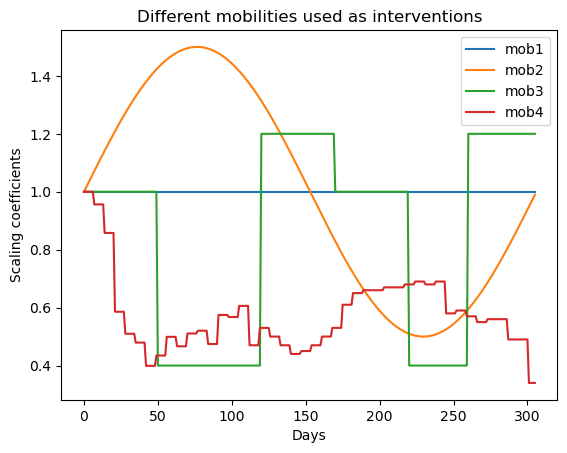

In [7]:
# from notebook 00
start_day = '2020-03-02'
end_day   = '2021-01-01'
end_day_bis='2020-07-01'
all_days = cv.date_range(start_day, end_day)

coef_mobility=[1+floatmobility[i] for i in range(len(floatmobility))]
coef_mobility_by_week=np.array([coef_mobility[i//7] for i in range(len(all_days))])

mob1=[1 for i in range(len(coef_mobility_by_week))]
mob2=[1+0.5*np.sin(2*np.pi*i/len(coef_mobility_by_week)) for i in range(len(coef_mobility_by_week))]
mob3=[1 for i in range(50)] + [ 0.4 for i in range(70)] + [ 1.2 for i in range(50)] + [1 for i in range(50)] + [ 0.4 for i in range(40)] + [ 1.2 for i in range(46)]

plt.plot(mob1, label='mob1')
plt.plot(mob2, label='mob2')
plt.plot(mob3, label='mob3')
plt.plot(coef_mobility_by_week, label='mob4')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Scaling coefficients')
plt.title('Different mobilities used as interventions')
plt.show()